<a href="https://colab.research.google.com/github/amontanor/MachineLearning/blob/main/Cuaderno2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

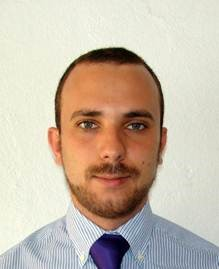

In [4]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow
# construct the argument parser and parse the arguments
image = cv2.imread("images/FotoAntonio.jpg")
cv2_imshow(image)

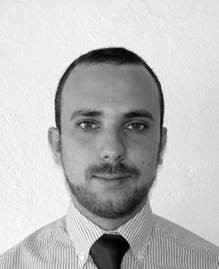

(0.0, 256.0)

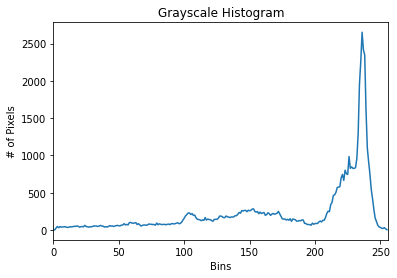

In [8]:
# convert the image to grayscale and create a histogram
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

flattened feature vector size: 768


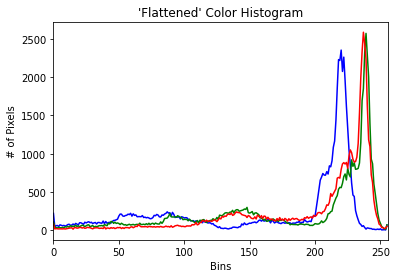

In [10]:
# grab the image channels, initialize the tuple of colors,
# the figure and the flattened feature vector
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and
	# concatenate the resulting histograms for each
	# channel
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	features.extend(hist)
	# plot the histogram
	plt.plot(hist, color = color)
	plt.xlim([0, 256])
# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values -- in practice, we would
# normally not use 256 bins for each channel, a choice
# between 32-96 bins are normally used, but this tends
# to be application dependent
print ("flattened feature vector size: %d" % (np.array(features).flatten().shape))